# Python for (open) Neuroscience

_Lecture 1.1_ - Intro to `pandas`

Luigi Petrucco

Jean-Charles Mariani

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/lectures/Lecture1.2_Intro-pandas.ipynb)

## `numpy` 🧮

A final note on `numpy` boolean indexing & arrays

## Boolean operations with arrays

In [37]:
import numpy as np

In [46]:
an_array = np.array([1, 2, 3, 4, 5])

In [47]:
condition_0 = an_array > 2
condition_1 = an_array < 5

print(condition_0)
print(condition_1)

[False False  True  True  True]
[ True  True  True  True False]


To compute the and condition element-wise we use `&`:

In [43]:
condition_0 & condition_1

array([False, False,  True,  True, False])

To compute the or condition element-wise we use `|`:

In [44]:
condition_0 | condition_1

array([ True,  True,  True,  True,  True])

To compute the not condition (over a single array) element-wise we use `~`:

In [45]:
~condition_0

array([ True,  True, False, False, False])

Mind the execution order!

In [ ]:
a > 0 & b < 5


## `pandas`!

Or, the magic of semantic indexing and data aggregation

 - not that magical for R people. But hopefully you'll feel at home

- (also, under a geek definition of "magic"...)

### A problem for arrays

With numpy arrays, we cannot work with "semantic" axes (i.e., we will always have to remember what our axes were)

Also, we always need to work with square arrays (same numbers of values over every axis).

This can be a pain for real world -_i.e._, dishomogenous - data!

Also, numpy does not offer handy ways to aggregate data

## `pandas` 🐼 can help us here

In [3]:
import pandas as pd
import numpy as np

In [4]:
# get a pandas sample dataset:
def get_dataset():
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m&start_date=2023-02-01&end_date=2023-05-28&format=csv"
    return pd.read_csv(URL, skiprows=3)
df = get_dataset()
df

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),windspeed_10m (km/h),winddirection_10m (°)
0,2023-02-01T00:00,4.6,77,0.1,20.9,274
1,2023-02-01T01:00,4.5,76,0.2,20.5,273
2,2023-02-01T02:00,4.5,74,0.0,20.5,273
3,2023-02-01T03:00,4.4,77,0.0,18.4,269
4,2023-02-01T04:00,4.3,77,0.0,17.1,262
...,...,...,...,...,...,...
2803,2023-05-28T19:00,24.7,56,0.1,17.2,64
2804,2023-05-28T20:00,22.3,67,0.1,18.3,54
2805,2023-05-28T21:00,19.8,77,0.1,19.1,47
2806,2023-05-28T22:00,19.2,78,0.0,17.9,52


### `pd.DataFrame` and `pd.Series`

`pd.DataFrame`/`pd.Series` are `pandas` data collection type!
 - `pd.DataFrame` is a 2D data structure
  - `pd.Series` is a 1D data structure

## `pd.DataFrame`

2D data structure with labelled **columns** and indexed **rows**

In [5]:
df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
    columns=["col0", "col1", "col2"],
    index=["row1", "row2", "row3", "row4"],
)

Dataframes are a great way of storing multiple data for the same elements!

## `pd.DataFrame` indexing

Index dataframe over columns:

In [6]:
df["col0"]

row1     1
row2     4
row3     7
row4    10
Name: col0, dtype: int64

Once we have selected a column, what we get is a `pd.Series`

### `pd.Series`

`pd.Series` are 1-dimensional data structures - basically columns of  `pd.DataFrame`s

`pd.Series` have indexed rows, and a name (the name of the column they come from):

In [32]:
a_series_from_df = df["col0"]
type(a_series_from_df)

pandas.core.series.Series

In [33]:
a_series_from_df.index

Index(['row1', 'row2', 'row3', 'row4'], dtype='object')

In [34]:
a_series_from_df.name

'col0'

### Back to indexing dataframes...

We can select multiple columns (with a list of columns):

In [9]:
df[["col0", "col2"]]

,col0,col2
row1,1,3
row2,4,6
row3,7,9
row4,10,12


Index data over rows:

We can select rows (with a list / range of rows):

In [11]:
df.loc["row1":"row3"]

,col0,col1,col2
row1,1,2,3
row2,4,5,6
row3,7,8,9


### `.loc`

Index over both rows and columns using `.loc` (not a method! mind the square brackets):

In [20]:
df.loc["row1", "col0"]

1

We can select multiple rows and columns (with a list / range of rows and columns):

In [22]:
df.loc["row1":"row3", "col0":"col2"]

,col0,col1,col2
row1,1,2,3
row2,4,5,6
row3,7,8,9


Often, we use boolean indexing to select rows:

In [26]:
df.loc[df["col2"] > 5]

,col0,col1,col2
row2,4,5,6
row3,7,8,9
row4,10,11,12


### `.iloc`

It is very common to use multiple critieria to select rows:

In [ ]:
df.loc[(df["col2"] > 5) & ]

If we feel like using numpy-like indexing, we can use `.iloc`:

In [29]:
df.iloc[0, 0]

1

In [35]:
pd.Series([1, 2, 3], name="a")

0    1
1    2
2    3
Name: a, dtype: int64

### Create `pd.DataFrames`

We can create a dataframe from a dictionary of arrays (lists):

In [9]:
dict_array = dict(a=[1, 2, 3], b=[4, 5, 6])

pd.DataFrame(dict_array)

,a,b
0,1,4
1,2,5
2,3,6


 or from a list of dictionaries:

### `pd.DataFrame`'s methods

`pd.DataFrame`s and `pd.Series` have many, many methods!

In [15]:
df

,a,b,c
row1,1,2,3
row2,4,5,6


In [16]:
df.mean()

a    2.5
b    3.5
c    4.5
dtype: float64

In [18]:
df.median()

a    2.5
b    3.5
c    4.5
dtype: float64

In [19]:
df.std()

a    2.12132
b    2.12132
c    2.12132
dtype: float64

In [20]:
df.describe()

,a,b,c
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


### `pd.DataFrame`'s plotting methods

`pd.DataFrame`s and `pd.Series` have many, many plotting methods!

<AxesSubplot:>

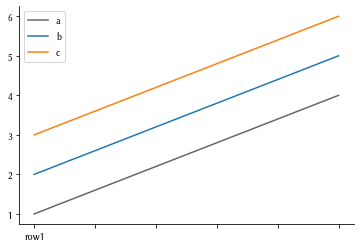

In [21]:
df.plot()

<AxesSubplot:>

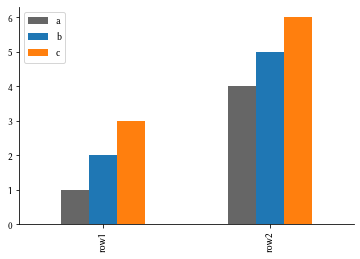

In [22]:
df.plot(kind="bar")

<AxesSubplot:>

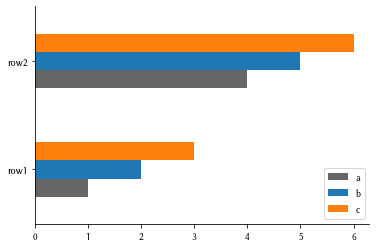

In [23]:
df.plot(kind="barh")

<AxesSubplot:>

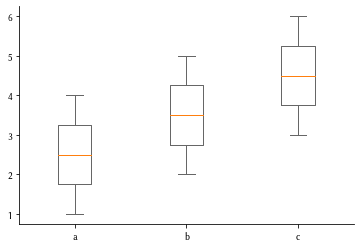

In [24]:
df.plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

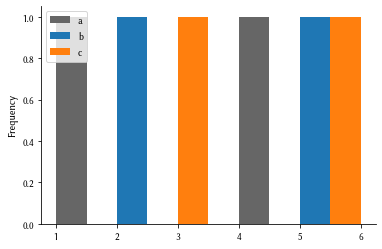

In [25]:
df.plot(kind="hist")

<AxesSubplot:xlabel='a', ylabel='b'>

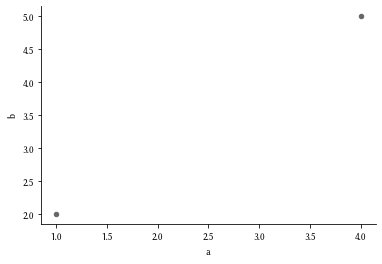

In [26]:
df.plot(kind="scatter", x="a", y="b")

<AxesSubplot:xlabel='a', ylabel='b'>

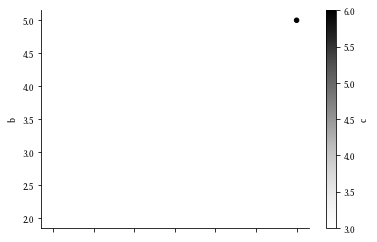

In [27]:
df.plot(kind="scatter", x="a", y="b", c="c")

## Clean data using `pd.DataFrame`s

### Missing data

As in numpy, we represent missing data by `NaN` (not a number).

In [48]:
df = pd.DataFrame(dict(a=[1, 2, np.nan, 4], b=[0, np.nan, 4, 5]))

To deal with missing data, we can use `pd.DataFrame`'s interpolation methods. By default, it will use linear interpolation:

In [49]:
df.interpolate()

,a,b
0,1.0,0.0
1,2.0,2.0
2,3.0,4.0
3,4.0,5.0


## Aggregate over columns

It can be useful to aggregate statistics based on the values of a column.
Imagine we have a dataframe with labels on a column and values on another:

In [67]:
df = pd.DataFrame(dict(labels=["a", "a", "b", "b"], values=[1, 2, 3, 4]))
df = df.set_index("labels")
df

,values
labels,
a,1
a,2
b,3
b,4


In [71]:
df.groupby("labels").mean()

,values
labels,
a,1.5
b,3.5


## Organize data in a dataframe

At the beginning the lack of hierarchy of a dataframe can be surprising!

But! As long as we assign label columns to our groups, we can perform statistics very easily.

In [69]:
df

,values
labels,
a,1
a,2
b,3
b,4


In [74]:
group_means = df.groupby("labels").mean()
df - group_means  # subtract the mean for each group

,values
labels,
a,-0.5
a,0.5
b,-0.5
b,0.5


In [60]:
means

,values
labels,
a,1.5
b,3.5
